# 유튜브 랭킹 시각화

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

In [4]:
from google.colab import files
uploaded= files.upload()
filename

Saving 유튜브_순위.csv to 유튜브_순위 (2).csv


'유튜브_순위.csv'

In [64]:
df= pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [21]:
x= '64,300'

x= int(x.replace(',', ''))
x

64300

In [22]:
# 구독자수(문자열) 👉 구독자수2(정수)
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [71]:
def str2int(x):
  return int(x.replace(',',''))

In [63]:
df['비디오수2'] = df.비디오수.apply(lambda x: int(x.replace(',','')))
df.head()

채널명,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,000,000",19003810000,371,64000000,371
1,음악/댄스/가수,HYBE LABELS,"60,300,000",18713050000,654,60300000,654
2,음악/댄스/가수,BANGTANTV,"56,400,000",12194960000,"1,579",56400000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000",21870920000,"3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000",11052880000,223,26500000,223


* 비디오수 Top20(채널명, 비디오수)막대그래프

In [39]:
df2=df.sort_values(by='비디오수2', ascending=False).head(20)


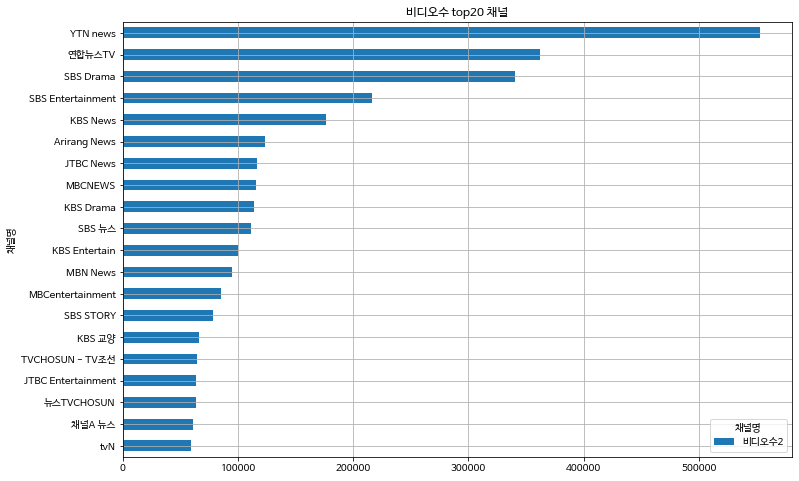

In [46]:
df2=df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False).head(20)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid='True', figsize=(12,8))
plt.title('비디오수 top20 채널')
plt.show()

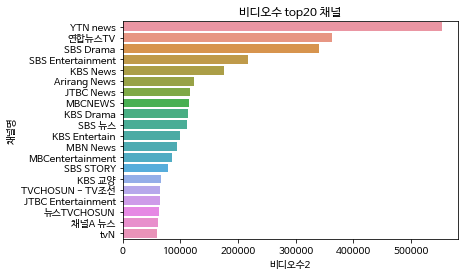

In [53]:
import seaborn as sns
df2=df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))
plt.title('비디오수 top20 채널')
plt.show()

* 조회수 기준 top20 채널 시각화

In [72]:
df['조회수2'] = df.조회수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,조회수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,19003810000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,18713050000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",12194960000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",21870920000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,11052880000


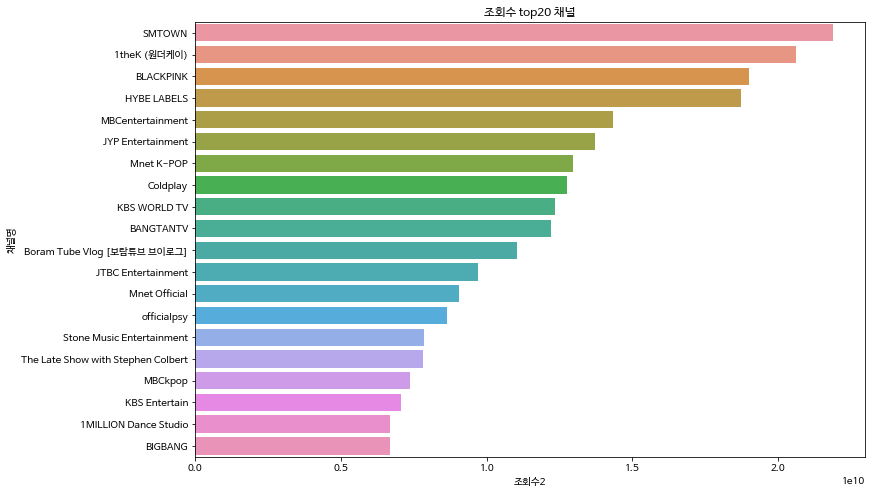

In [73]:
df2=df[['채널명', '조회수2']].sort_values(by='조회수2', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='조회수2', data=df2.head(20))
plt.title('조회수 top20 채널')
plt.show()

* 체널의 카테고리 수 분포

In [75]:
df.카테고리.value_counts().to_frame()

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


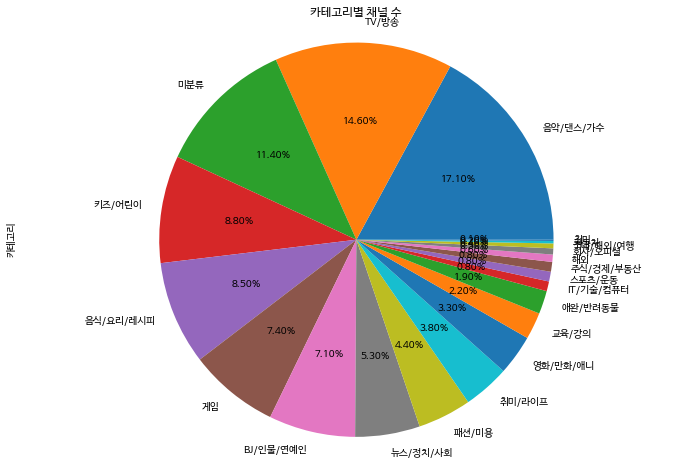

In [85]:
df3 = df.카테고리.value_counts()

plt.figure(figsize=(12,8))
df3.plot.pie(autopct='%.2f%%')
plt.title('카테고리별 채널 수')
plt.axis('equal')
plt.show()

* 카테고리별 구독자수 합계 시각화

In [100]:
df['구독자수2']= df['구독자수'].apply(str2int)
df4 = df[['카테고리','구독자수2']].groupby('카테고리').agg(['count','sum'])
df4.columns=['채널수','구독자수_합계']
df4.sort_values(by='구독자수_합계', ascending=False, inplace=True)
df4

,채널수,구독자수_합계
카테고리,,
음악/댄스/가수,171,674180000
키즈/어린이,88,257740000
TV/방송,146,229720000
음식/요리/레시피,85,180570000
미분류,114,143340000
BJ/인물/연예인,71,97560000
뉴스/정치/사회,53,71020000
게임,74,67170000
취미/라이프,38,47890000


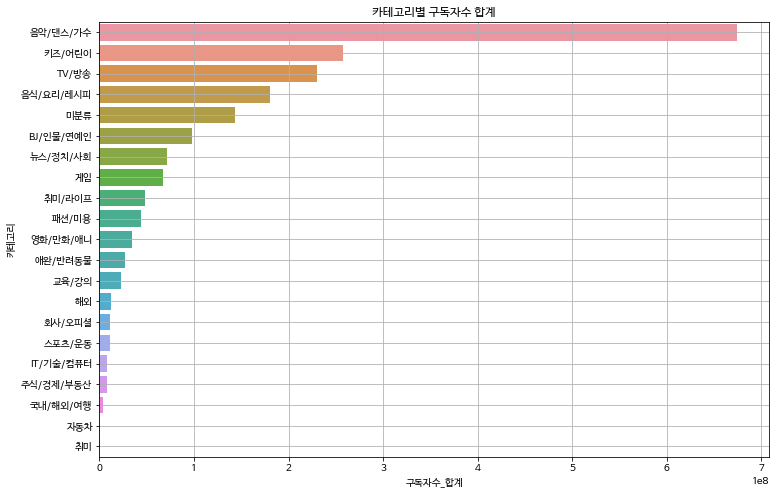

In [109]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수_합계', y=df4.index, data=df4)
plt.title('카테고리별 구독자수 합계')
plt.grid()
plt.show()